In [1]:
#import required packages

import networkx as nx #networks package we will use for demos
import matplotlib.pyplot as plt #networkx uses matplotlib to generate its plots

import numpy as np #this is the linear algebra package for working with matrices
import pandas as pd #pandas is a dataframe package that is useful for managing network attributes

import math #use this package to take the log of a scalar, use numpy to take the element-wise log of an array

import os

In [2]:
df = pd.read_csv('final_cleaned.csv',sep=",", header = None)
df.columns = ["idx","Language", "Influenced By", "Influenced","Year"]
df = df[["Language","Influenced By","Influenced","Year"]]
df

,Language,Influenced By,Influenced,Year
0,Z++,NaN,NaN,1.0
1,JEAN,NaN,NaN,1.0
2,Job Control Language,NaN,[Control Language],1.0
3,Jess,NaN,NaN,1.0
4,JavaFX Script,NaN,NaN,1.0
...,...,...,...,...
667,SuperTalk,[HyperTalk],NaN,2024.0
668,SYMPL,[JOVIAL],NaN,2024.0
669,GRASS,[BASIC],NaN,2024.0
670,Visual FoxPro,[dBase],NaN,2024.0


In [3]:
# get the in degree and out degree sequence
k_in = []
k_out = []
for index, row in df.iterrows():
    #print(index)
    if pd.isna(row[1]):
        k_in.append(0)
    else:
        k_in.append(row[1].count(',')+1)
    if pd.isna(row[2]):
        k_out.append(0)
    else:
        k_out.append(row[2].count(',')+1)

In [4]:
# calculate flux
flux = [0]*len(k_in)
print(len(flux))


672


In [5]:
sum(k_in)

897

In [6]:
sum(k_out)

897

In [7]:
lamb = [0]*len(k_in)
for i in range(1,len(lamb)):
    in_sub = k_in[:i]
    out_sub = k_out[:i]
    sum_in = sum(in_sub)
    sum_out = sum(out_sub)
    flux[i] = sum_out - sum_in

In [8]:
year_list = df["Year"].values.tolist()
distinct_yr_list = [*set(year_list)]
distinct_yr_list.sort()
flux_dict = {}
for i in range(len(year_list)):
    if year_list[i] in flux_dict:
        flux_dict[year_list[i]].append(flux[i])
    else:
        flux_dict[year_list[i]] = [flux[i]]
x_axis = []
y_axis = []
for i in range(1,len(distinct_yr_list)):
    x_axis.append(distinct_yr_list[i])
    arr = flux_dict[distinct_yr_list[i]]
    avg = sum(arr)/len(arr)
    y_axis.append(avg)


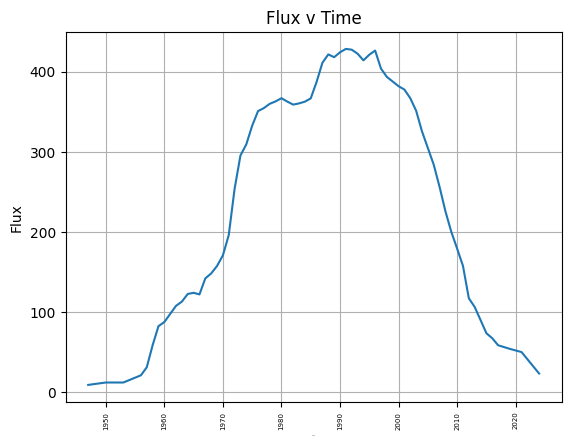

In [9]:
plt.xticks(fontsize=5, rotation=90)
plt.plot(x_axis, y_axis)
plt.title('Flux v Time')
plt.xlabel('Year',fontsize=1)
plt.ylabel('Flux')
plt.grid(True)
plt.show()

In [13]:
import random
def randomgraph_edgelist(k_in,k_out):
    #value in edgelist holds [["Influenced By"],["Influenced"]] nodes according to their index
    edgelist = {}
    edgelist[0] = [[],[]]
    unclaimed_instub = []
    # initialize unclaimed instub
    for i in range(k_out[0]):
        unclaimed_instub.append(0)
    for node in range(1,len(k_out)):
        edgelist[node] = [[],[]]
        if k_in[node] > 0:
            # pick random outstub to connect with 
            for i in range(k_in[node]):
                rand_idx = random.randrange(len(unclaimed_instub))
                # should we make sure that we don't have multiedges or will it mess up our calculation? Maybe ask professor
                # while unclaimed_instub[rand_idx] in edgelist:
                #     rand_idx = random.randrange(len(unclaimed_instub))
                edgelist[node][0].append(unclaimed_instub[rand_idx])
                edgelist[unclaimed_instub[rand_idx]][1].append(node)
                unclaimed_instub.pop(rand_idx)
        for j in range(k_out[node]):
            unclaimed_instub.append(node)
    return edgelist

In [19]:
elist1 = randomgraph_edgelist(k_in,k_out)

In [20]:
elist2 = randomgraph_edgelist(k_in,k_out)